# Get feature importance / SHAP values

In [1]:
import numpy as np
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as pl
import ml_help
from time import time
import seaborn as sns
sns.set_theme()

/home/uncle_opal/miniconda3/envs/rapids/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/home/uncle_opal/miniconda3/envs/rapids/lib/python3.10/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def d

In [2]:
df = pd.read_csv("./data/yonge_flow_weather_incidents.csv.zip")
df

,currentSpeed,Mag. of Delay,Length,Delay,Dist. from Point,Visibility,Temperature,Feels Like,Humidity,Wind Speed,...,November,October,September,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,10.0,2.0,372.91800,199.0,0.001789,10.0,18.69,18.68,79.0,2.57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,10.0,0.0,302.76535,0.0,0.112289,10.0,18.69,18.68,79.0,2.57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,10.0,0.0,302.76535,0.0,0.112289,10.0,18.69,18.68,79.0,2.57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,10.0,0.0,273.82825,0.0,0.127365,10.0,18.69,18.68,79.0,2.57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,10.0,0.0,254.24487,0.0,0.112289,10.0,18.69,18.68,79.0,2.57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94032,10.0,0.0,0.00000,0.0,-1.000000,10.0,9.77,6.07,41.0,9.26,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
94033,13.0,0.0,0.00000,0.0,-1.000000,10.0,9.77,6.07,41.0,9.26,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
94034,18.0,0.0,0.00000,0.0,-1.000000,10.0,9.64,5.90,40.0,9.26,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
94035,13.0,0.0,0.00000,0.0,-1.000000,10.0,9.61,5.86,40.0,9.26,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [3]:
X = df.drop("currentSpeed",axis=1)
y = df["currentSpeed"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.80 = 0.20

# XGBoost

Fitting...
Fitting... OK! Took 16.635189056396484 seconds
Explaining...
Explaining... OK! Took 4.696934938430786 seconds
Calculating shap values...


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Calculating shap values... OK! Took 63.286354303359985 seconds


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


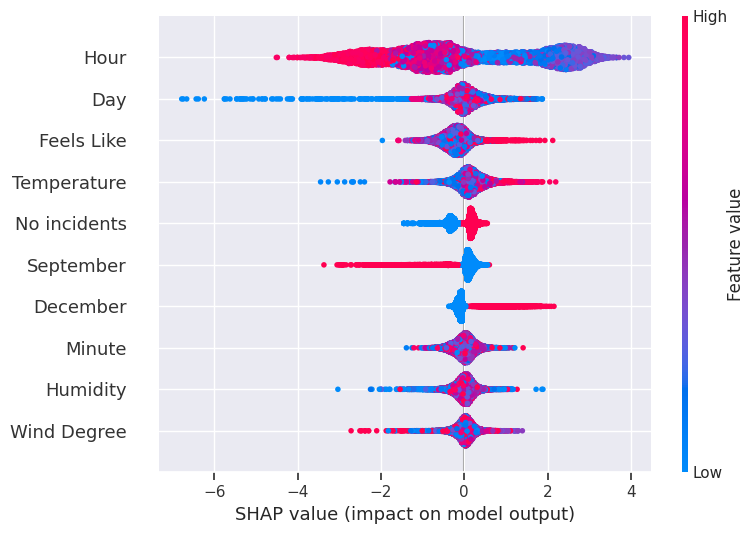

In [4]:
import xgboost as xgb

params = ml_help.params_to_dict("143_xgboost")
params["predictor"] = "cpu_predictor"
params["tree_method"] = "hist"

model = xgb.XGBRegressor(**params)

print("Fitting...")
start = time()
model.fit(X_train, y_train)
end = time()
print(f"Fitting... OK! Took {end - start} seconds")

print("Explaining...")
start = time()
explainer = shap.TreeExplainer(model)
end = time()
print(f"Explaining... OK! Took {end - start} seconds")

print("Calculating shap values...")
start = time()
shap_values = explainer.shap_values(X_test)
end = time()
print(f"Calculating shap values... OK! Took {end - start} seconds")

shap.summary_plot(shap_values, X_test, max_display=10, show=False)
xgboost_fig = pl.gcf()
pl.savefig("./plots/146_xgboost.eps", format="eps", bbox_inches="tight")
pl.savefig("./plots/146_xgboost.png", bbox_inches="tight")
pl.savefig("./plots/146_xgboost.pdf", bbox_inches="tight")

# Random Forest

Fitting...
Fitting... OK! Took 44.11411190032959 seconds
Explaining...
Explaining... OK! Took 0.009990215301513672 seconds
Calculating shap values...
Calculating shap values... OK! Took 58.63114619255066 seconds


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


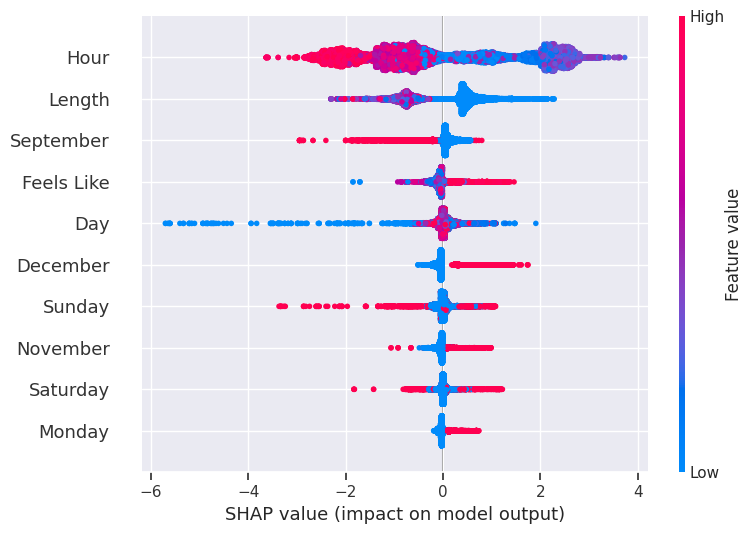

In [5]:
from sklearn.ensemble import RandomForestRegressor

params = ml_help.params_to_dict("143_random_forest")
model = RandomForestRegressor(**params)

print("Fitting...")
start = time()
model.fit(X_train, y_train)
end = time()
print(f"Fitting... OK! Took {end - start} seconds")

print("Explaining...")
start = time()
explainer = shap.TreeExplainer(model)
end = time()
print(f"Explaining... OK! Took {end - start} seconds")

print("Calculating shap values...")
start = time()
shap_values = explainer.shap_values(X_test)
end = time()
print(f"Calculating shap values... OK! Took {end - start} seconds")

shap.summary_plot(shap_values, X_test, max_display=10, show=False)
pl.savefig("./plots/146_random_forest.eps", format="eps", bbox_inches="tight")
pl.savefig("./plots/146_random_forest.png", bbox_inches="tight")
pl.savefig("./plots/146_random_forest.pdf", bbox_inches="tight")

# Decision Tree

Fitting...
Fitting... OK! Took 0.3370211124420166 seconds
Explaining...
Explaining... OK! Took 0.0009768009185791016 seconds
Calculating shap values...
Calculating shap values... OK! Took 0.3059413433074951 seconds


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


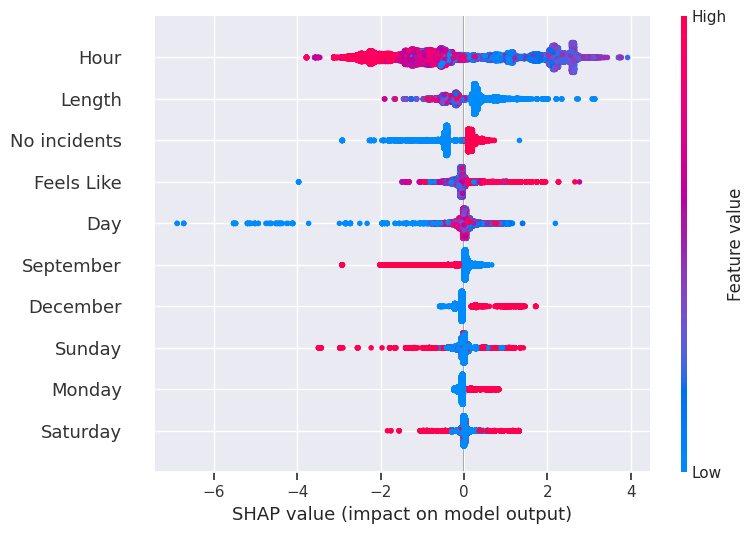

In [6]:
from sklearn.tree import DecisionTreeRegressor

params = ml_help.params_to_dict("143_decision_tree")
model = DecisionTreeRegressor(**params)

print("Fitting...")
start = time()
model.fit(X_train, y_train)
end = time()
print(f"Fitting... OK! Took {end - start} seconds")

print("Explaining...")
start = time()
explainer = shap.TreeExplainer(model)
end = time()
print(f"Explaining... OK! Took {end - start} seconds")

print("Calculating shap values...")
start = time()
shap_values = explainer.shap_values(X_test)
end = time()
print(f"Calculating shap values... OK! Took {end - start} seconds")

shap.summary_plot(shap_values, X_test, max_display=10, show=False)
pl.savefig("./plots/146_decision_tree.eps", format="eps", bbox_inches="tight")
pl.savefig("./plots/146_decision_tree.png", bbox_inches="tight")
pl.savefig("./plots/146_decision_tree.pdf", bbox_inches="tight")

# MLP

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


Fitting...


X does not have valid feature names, but MLPRegressor was fitted with feature names


Fitting... OK! Took 68.08802151679993 seconds
Explaining...
Explaining... OK! Took 0.0006554126739501953 seconds
Calculating shap values...


100%|███████████████████████████████████| 18808/18808 [1:38:45<00:00,  3.17it/s]
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


Calculating shap values... OK! Took 5925.262378692627 seconds


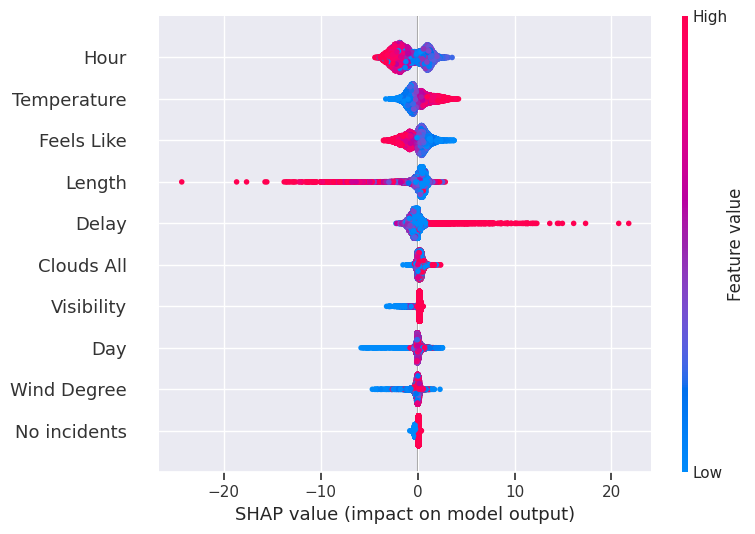

In [7]:
from sklearn.neural_network import MLPRegressor
import warnings

X_train_summary = shap.kmeans(X_train, 10)

params = ml_help.params_to_dict("143_mlpr")
model = MLPRegressor(**params)

print("Fitting...")
start = time()
model.fit(X_train, y_train)
end = time()
print(f"Fitting... OK! Took {end - start} seconds")

print("Explaining...")
start = time()
explainer = shap.KernelExplainer(model.predict, X_train_summary)
end = time()
print(f"Explaining... OK! Took {end - start} seconds")

print("Calculating shap values...")
start = time()
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    shap_values = explainer.shap_values(X_test)
end = time()
print(f"Calculating shap values... OK! Took {end - start} seconds")

shap.summary_plot(shap_values, X_test, max_display=10, show=False)
pl.savefig("./plots/146_mlp.eps", format="eps", bbox_inches="tight")
pl.savefig("./plots/146_mlp.png", bbox_inches="tight")
pl.savefig("./plots/146_mlp.pdf", bbox_inches="tight")